<h1> Título del tema: problemática para revisión de estados diarios en encuestas capturadas en AG </h1>

<h2>1. Indetificación del problema</h2>

- Problema en la visualización de cambios de estados en programa de revisión de encuestas (AG)

El cliente interno, requiere una manera de poder ver cómo va cambiando los estados de encuestas a medida que corre una ola (mes) de información capturada. Actualmente solo pueden verlo entrando por cada encuesta, y viéndolo en pantalla en una pestaña que posee la herramienta de revisión (AG). Igualmente puede exportar todo el contenido en Excel, pero solo muestra el ultimo estado, y esto se hace de forma manual.

- Investigación

Se investigo, y la manera más factible es implementar un proceso interno (tipo job), que extraiga los datos por día con el log de encuestas y este se procese mediante el uso de notebook en Azure Databrick, de tal forma que el cliente pueda tener sus datos diarios del contenido mediante el uso final de herramientas como PowerBI y pueda darle seguimiento al campo.

- Búsqueda de soluciones anteriores

Actualmente existe un proceso hecho desde SQL pero tiene varios pasos para llevar el dato a otro servidor, y cual toma más tiempo igualmente generarlo, la idea es que todo pase por un solo proceso.



<h1>2. Procesamiento de datos</h1>

Primer paso: Obtener los datos de la base y pasar a DataFrame cada componente requerido para el análisis de datos.
Se asume que ya hay un proceso que no está dando el dato en Azure Datalake el cual nos da el dato en tablas en archivos csv. Para la demostración se tomará los archivos localmente. Las tablas serán AG_Tracking_Estados, Canal, Gec, PDV, Ubicacion, Interview


Importamos libreria panda

In [3]:
import pandas as pd

Carga de datos a cada DataFrame

In [19]:
Interview = pd.read_csv('RG01_Interview_utf.csv', index_col=1) #se toma el indice 0 columan (RefID), como la llave de la tabla

Interview.head(3)

,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,OlaID
RefID,,,,,,
270078355,843019,kotr_pa_10003,2022-02-04 20:56:23.977000000,1105821989,https://s3.amazonaws.com/repositorio-unico/004...,84
270078830,843020,kotr_gte_10001,2022-02-04 20:56:23.977000000,2603412724,https://s3.amazonaws.com/repositorio-unico/004...,84
270080284,843120,kotr_sv_10009,2022-02-04 20:56:23.977000000,6000425068,https://s3.amazonaws.com/repositorio-unico/004...,84


In [8]:
AG_Tracking_Estados = pd.read_csv('AG_Tracking_Fechas_utf.csv') #indice autogenerado, ya que la tabla no tiene llave unica

AG_Tracking_Estados.head(3)

,OlaID,InterviewRefID,Cambio Status,FechaC,Observaciones
0,84,270147093,Aprobada,2022-02-02 16:54:36.000,NaN
1,84,270147166,Aprobada,2022-02-02 19:29:21.000,NaN
2,84,270147166,En Proceso,2022-02-02 19:24:50.000,NaN


In [9]:
Canal = pd.read_csv('MA_CANAL_utf.csv', index_col=0) #se toma el indice 0 columan (ID), como la llave de la tabla

Canal.head(3)

,REFID,Canal,OlaID
ID,,,
1,1,Home Market Tradicional,84
3,3,On Premise,84
4,999,Código Erróneo,84


In [10]:
Gec = pd.read_csv('MA_GEC_utf.csv', index_col=0) #se toma el indice 0 columan (ID), como la llave de la tabla

Gec.head(3)

,Gec,OlaID
ID,,
8601,Oro,84
8602,Plata,84
8603,Bronce,84


In [14]:
PDV = pd.read_csv('MA14_PDV_Ola_utf.csv', index_col=2) #se toma el indice 3 columan (PDVRefID), como la llave de la tabla

PDV.head(3)

,OlaID,PDVID,UbicacionID1,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName
PDVRefID,,,,,,,,
1105200004,84,158635,1098,1122,1,13,8601,MS LA BUEVA SUERTE
1105200016,84,158634,1098,1122,1,13,8601,MULTI CENTRO NG
1105200031,84,160093,1098,1122,1,13,8601,MS ORIENTAL


In [51]:
ubicacion = pd.read_csv('OM_UBICACION_utf.csv', index_col=0) #se toma el indice 0 columan (ID), como la llave de la tabla

ubicacion.head(3)

,ParentID,Ubicacion,OlaID
ID,,,
100,0,Ecuador,84
298,0,Honduras,84
299,0,El Salvador,84


<h1>3. Análisis de la información</h1>

Luego de la carga se estará haciendo merge sobre los datos para poder tener unificado los datos en un solo Dataframe, de tal forma que se puedan hacer los análisis generales.


In [24]:
AG_Tracking_1 = pd.merge(AG_Tracking_Estados,Interview,left_on="InterviewRefID", right_index=True)
AG_Tracking_1.head(3)

,OlaID_x,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,OlaID_y
0,84,270147093,Aprobada,2022-02-02 16:54:36.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84
8038,84,270147093,Encuesta original,2022-01-02 19:31:12.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84
10719,84,270147093,Publicado,2022-04-02 15:56:23.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84


In [44]:
AG_Tracking_2 = pd.merge(AG_Tracking_1,PDV,left_on="PDVRefID", right_index=True)
AG_Tracking_2.head(3)

,OlaID_x,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,OlaID_y,OlaID,PDVID,UbicacionID1,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName
0,84,270147093,Aprobada,2022-02-02 16:54:36.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84,84,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA
8038,84,270147093,Encuesta original,2022-01-02 19:31:12.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84,84,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA
10719,84,270147093,Publicado,2022-04-02 15:56:23.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84,84,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA


Verificación de los datos que se llevan agrupados y tipos de datos por columnas que van por el momento

In [45]:
#filtrado de un entrevista para validar que no hayan filas repetidas, estan deben tener codigos de indices diferentes y fechasC distintas, de lo contrario estaria incorrecto el dato.
AG_Tracking_2[ AG_Tracking_2["InterviewRefID"]==270147093 ]

,OlaID_x,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,OlaID_y,OlaID,PDVID,UbicacionID1,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName
0,84,270147093,Aprobada,2022-02-02 16:54:36.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84,84,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA
8038,84,270147093,Encuesta original,2022-01-02 19:31:12.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84,84,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA
10719,84,270147093,Publicado,2022-04-02 15:56:23.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84,84,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA
14364,84,270147093,En Proceso,2022-02-02 16:50:23.000,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,84,84,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA


In [46]:
#validar tipos de datos por columna de lo que va agrupado
AG_Tracking_2.dtypes

OlaID_x            int64
InterviewRefID     int64
Cambio Status     object
FechaC            object
Observaciones     object
ID                 int64
SurveyorName      object
TimeStamp         object
PDVRefID           int64
PDVIMG            object
OlaID_y            int64
OlaID              int64
PDVID              int64
UbicacionID1       int64
UbicacionID2       int64
CanalID1           int64
CanalID2           int64
ClaseID1           int64
PDVName           object
dtype: object

Existen columnas OlaID repetidas se procederá a eliminar y cambiara el tipo de datos de FechaC

In [47]:
AG_Tracking_2["FechaC"] = pd.to_datetime(AG_Tracking_2["FechaC"], unit="ns")
AG_Tracking_2 = AG_Tracking_2.drop(columns=["OlaID","OlaID_y"])
AG_Tracking_2.head(3)

,OlaID_x,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,PDVID,UbicacionID1,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName
0,84,270147093,Aprobada,2022-02-02 16:54:36,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA
8038,84,270147093,Encuesta original,2022-01-02 19:31:12,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA
10719,84,270147093,Publicado,2022-04-02 15:56:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA


In [48]:
AG_Tracking_2.dtypes

OlaID_x                    int64
InterviewRefID             int64
Cambio Status             object
FechaC            datetime64[ns]
Observaciones             object
ID                         int64
SurveyorName              object
TimeStamp                 object
PDVRefID                   int64
PDVIMG                    object
PDVID                      int64
UbicacionID1               int64
UbicacionID2               int64
CanalID1                   int64
CanalID2                   int64
ClaseID1                   int64
PDVName                   object
dtype: object

Se sigue el proceso de union de tablas canal ,ubicacion y gec

Para este punto hay que separar el dato de Canales, ya que este esta compuesto por Canal y SubCanal en la misma tabla, por eso en la tabla PDV existe el valor CanalID1 y CanalID2 lo que equivale a Canal y Subcanal respectivamente.

In [49]:
Canal = Canal.drop(columns=["OlaID","REFID"]) #se removio OlaID para no repetir el valor
SubCanal = Canal.copy()
SubCanal.rename(columns={'Canal': 'SubCanal'}, inplace=True)

AG_Tracking_3 = pd.merge(AG_Tracking_2,Canal,left_on="CanalID1", right_index=True)
AG_Tracking_3 = pd.merge(AG_Tracking_3,SubCanal,left_on="CanalID2", right_index=True)
AG_Tracking_3.head(3)

,OlaID_x,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,PDVID,UbicacionID1,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName,Canal,SubCanal
0,84,270147093,Aprobada,2022-02-02 16:54:36,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS
8038,84,270147093,Encuesta original,2022-01-02 19:31:12,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS
10719,84,270147093,Publicado,2022-04-02 15:56:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,241131,1143,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS


In [50]:
AG_Tracking_3.dtypes

OlaID_x                    int64
InterviewRefID             int64
Cambio Status             object
FechaC            datetime64[ns]
Observaciones             object
ID                         int64
SurveyorName              object
TimeStamp                 object
PDVRefID                   int64
PDVIMG                    object
PDVID                      int64
UbicacionID1               int64
UbicacionID2               int64
CanalID1                   int64
CanalID2                   int64
ClaseID1                   int64
PDVName                   object
Canal                     object
SubCanal                  object
dtype: object

Igual que los datos del Canal, tenemos para Ubicacion la misma separacion de UbicacionID1 y UbicacionID2, ya por conocer el proyecto tenemos que este dato representa Pais y Agencia, por lo que igualmente hay que separar el resultado y luego unirlo a la Dataframe final.

In [52]:
Pais = ubicacion.drop(columns=["OlaID","ParentID"]) #se removio OlaID para no repetir el valor y ParentID no es necesario para reporte que requieren.
Agencia = Pais.copy()
Pais.rename(columns={'Ubicacion': 'Pais'}, inplace=True)
Agencia.rename(columns={'Ubicacion': 'Agencia'}, inplace=True)

AG_Tracking_4 = pd.merge(AG_Tracking_3,Pais,left_on="UbicacionID1", right_index=True)
AG_Tracking_4 = pd.merge(AG_Tracking_4,Agencia,left_on="UbicacionID2", right_index=True)
AG_Tracking_4.head(3)

,OlaID_x,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,...,UbicacionID1,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName,Canal,SubCanal,Pais,Agencia
0,84,270147093,Aprobada,2022-02-02 16:54:36,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1143,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU
8038,84,270147093,Encuesta original,2022-01-02 19:31:12,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1143,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU
10719,84,270147093,Publicado,2022-04-02 15:56:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1143,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU


In [54]:
Gec = Gec.drop(columns=["OlaID"]) #se removio OlaID para no repetir el valor

AG_Tracking_5 = pd.merge(AG_Tracking_4,Gec,left_on="ClaseID1", right_index=True)
AG_Tracking_5.head(3)

,OlaID_x,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,...,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName,Canal,SubCanal,Pais,Agencia,Gec
0,84,270147093,Aprobada,2022-02-02 16:54:36,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
8038,84,270147093,Encuesta original,2022-01-02 19:31:12,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
10719,84,270147093,Publicado,2022-04-02 15:56:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977000000,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce


Se vuelve a validar los datos y tipos de variables, adicional se hace renombre de columna OlaID_x por OlaID

In [55]:
AG_Tracking_5.dtypes

OlaID_x                    int64
InterviewRefID             int64
Cambio Status             object
FechaC            datetime64[ns]
Observaciones             object
ID                         int64
SurveyorName              object
TimeStamp                 object
PDVRefID                   int64
PDVIMG                    object
PDVID                      int64
UbicacionID1               int64
UbicacionID2               int64
CanalID1                   int64
CanalID2                   int64
ClaseID1                   int64
PDVName                   object
Canal                     object
SubCanal                  object
Pais                      object
Agencia                   object
Gec                       object
dtype: object

In [56]:
AG_Tracking_5["TimeStamp"] = pd.to_datetime(AG_Tracking_5["TimeStamp"], unit="ns")
AG_Tracking_5.rename(columns={'OlaID_x': 'Ola'}, inplace=True)
AG_Tracking_5.head(3)

,Ola,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,...,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName,Canal,SubCanal,Pais,Agencia,Gec
0,84,270147093,Aprobada,2022-02-02 16:54:36,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
8038,84,270147093,Encuesta original,2022-01-02 19:31:12,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
10719,84,270147093,Publicado,2022-04-02 15:56:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce


In [57]:
AG_Tracking_5.dtypes

Ola                        int64
InterviewRefID             int64
Cambio Status             object
FechaC            datetime64[ns]
Observaciones             object
ID                         int64
SurveyorName              object
TimeStamp         datetime64[ns]
PDVRefID                   int64
PDVIMG                    object
PDVID                      int64
UbicacionID1               int64
UbicacionID2               int64
CanalID1                   int64
CanalID2                   int64
ClaseID1                   int64
PDVName                   object
Canal                     object
SubCanal                  object
Pais                      object
Agencia                   object
Gec                       object
dtype: object

In [58]:
AG_Tracking_5[ AG_Tracking_5["InterviewRefID"]==270147093 ]

,Ola,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,...,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName,Canal,SubCanal,Pais,Agencia,Gec
0,84,270147093,Aprobada,2022-02-02 16:54:36,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
8038,84,270147093,Encuesta original,2022-01-02 19:31:12,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
10719,84,270147093,Publicado,2022-04-02 15:56:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
14364,84,270147093,En Proceso,2022-02-02 16:50:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce


<h1>4. Publicación de resultados</h1>

Para el ejemplo, solo se guadará el resultado en un archivo de datos csv, pero en el proceso real debera ser publicado en el Datalake de Azure.

In [59]:
AG_Tracking_5.to_csv('Datos_reporte_Ola84.csv')

In [60]:
AG_Tracking_5

,Ola,InterviewRefID,Cambio Status,FechaC,Observaciones,ID,SurveyorName,TimeStamp,PDVRefID,PDVIMG,...,UbicacionID2,CanalID1,CanalID2,ClaseID1,PDVName,Canal,SubCanal,Pais,Agencia,Gec
0,84,270147093,Aprobada,2022-02-02 16:54:36,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
8038,84,270147093,Encuesta original,2022-01-02 19:31:12,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
10719,84,270147093,Publicado,2022-04-02 15:56:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
14364,84,270147093,En Proceso,2022-02-02 16:50:23,NaN,844005,kotr_gta_10005,2022-02-04 20:56:23.977,7808019063,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,YENIFER YULISA CARDONA,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
1299,84,273845545,Aprobada,2022-07-02 21:18:36,NaN,858010,kotr_gta_10005,2022-02-08 02:30:10.530,7808011324,https://s3.amazonaws.com/repositorio-unico/004...,...,1213,1,11,8603,JORGE NOE LOPEZ,Home Market Tradicional,TIENDAS,Guatemala ABVO,RETALHULEU,Bronce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,84,272885325,Redigitado,2022-07-02 10:20:43,¿Se respeta el bloque de Sabores?: Valor Anter...,854678,kotr_pa_10007,2022-02-08 00:21:02.137,1105601572,https://s3.amazonaws.com/repositorio-unico/004...,...,1121,1,13,8601,M/S YA,Home Market Tradicional,MINIMERCADOS,Panamá,DIST. CHORRERA,Oro
9754,84,272885325,Encuesta original,2022-06-02 10:40:49,NaN,854678,kotr_pa_10007,2022-02-08 00:21:02.137,1105601572,https://s3.amazonaws.com/repositorio-unico/004...,...,1121,1,13,8601,M/S YA,Home Market Tradicional,MINIMERCADOS,Panamá,DIST. CHORRERA,Oro
12428,84,272885325,Publicado,2022-07-02 19:21:02,NaN,854678,kotr_pa_10007,2022-02-08 00:21:02.137,1105601572,https://s3.amazonaws.com/repositorio-unico/004...,...,1121,1,13,8601,M/S YA,Home Market Tradicional,MINIMERCADOS,Panamá,DIST. CHORRERA,Oro
14515,84,272885325,En Proceso,2022-07-02 10:19:45,NaN,854678,kotr_pa_10007,2022-02-08 00:21:02.137,1105601572,https://s3.amazonaws.com/repositorio-unico/004...,...,1121,1,13,8601,M/S YA,Home Market Tradicional,MINIMERCADOS,Panamá,DIST. CHORRERA,Oro


<h1>5. Prueba de resultados generando datos estadísticos</h1>

Se efectuará una serie de pruebas, a futuras solicitudes estadísticas de la información que podrían ser útil para el uso en alguna herramienta de análisis.

Para el ejemplo si simula que se esté pidiendo el % de Efectividad de encuestas aprobadas vs las encuestas que han sido publicadas al visualizador por País, por ejemplo, PowerBI.

Primero se toma el filtro de datos Aprobados y estos luego son agrupados para hacer el conteo de casos por País.

In [112]:
AG_Tracking_filtrado_1 = AG_Tracking_5.copy()
AG_Tracking_filtrado_1 = AG_Tracking_filtrado_1[AG_Tracking_filtrado_1["Cambio Status"] == "Aprobada"]
AG_Tracking_filtrado_1 = AG_Tracking_filtrado_1.groupby(["Pais"], as_index=False)["Cambio Status"].count()
AG_Tracking_filtrado_1.rename(columns={'Cambio Status': 'Aprobadas'}, inplace=True)
AG_Tracking_filtrado_1

,Pais,Aprobadas
0,Costa Rica,346
1,EMBOCEN Guatemala,254
2,El Salvador,297
3,Guatemala ABVO,414
4,Honduras,459
5,Nicaragua,559
6,Panamá,142
7,Republica Dominicana,610


Luego tomaremos el dato filtrado para los estados Publicados, y a su vez se agruparan por País y conteo de casos.

In [113]:
AG_Tracking_filtrado_2 = AG_Tracking_5.copy()
AG_Tracking_filtrado_2 = AG_Tracking_filtrado_2[AG_Tracking_filtrado_2["Cambio Status"] == "Publicado"]
AG_Tracking_filtrado_2 = AG_Tracking_filtrado_2.groupby(["Pais"], as_index=False)["Cambio Status"].count()
AG_Tracking_filtrado_2 = AG_Tracking_filtrado_2.set_index('Pais')
AG_Tracking_filtrado_2.rename(columns={'Cambio Status': 'Publicadas'}, inplace=True)
AG_Tracking_filtrado_2

,Publicadas
Pais,
Costa Rica,316
EMBOCEN Guatemala,240
El Salvador,276
Guatemala ABVO,392
Honduras,438
Nicaragua,314
Panamá,116
Republica Dominicana,589


Luego hacemos Merge sobre los datos a través de la columna Pais.

In [114]:
AG_Tracking_resultado1 = pd.merge(AG_Tracking_filtrado_1,AG_Tracking_filtrado_2,left_on="Pais", right_index=True)
AG_Tracking_resultado1

,Pais,Aprobadas,Publicadas
0,Costa Rica,346,316
1,EMBOCEN Guatemala,254,240
2,El Salvador,297,276
3,Guatemala ABVO,414,392
4,Honduras,459,438
5,Nicaragua,559,314
6,Panamá,142,116
7,Republica Dominicana,610,589


Luego obtenemos el % de Efectividad de resultados Aprobados vs los que ya fueron publicados en el navegador, por lo que se creara una nueva columna con el resultado calculado al final.

In [116]:
AG_Tracking_resultado1["% Efectivas"] = round((AG_Tracking_resultado1["Publicadas"]*100)/AG_Tracking_resultado1["Aprobadas"],2)
AG_Tracking_resultado1

,Pais,Aprobadas,Publicadas,% Efectivas
0,Costa Rica,346,316,91.33
1,EMBOCEN Guatemala,254,240,94.49
2,El Salvador,297,276,92.93
3,Guatemala ABVO,414,392,94.69
4,Honduras,459,438,95.42
5,Nicaragua,559,314,56.17
6,Panamá,142,116,81.69
7,Republica Dominicana,610,589,96.56


Resultados de forma grafica

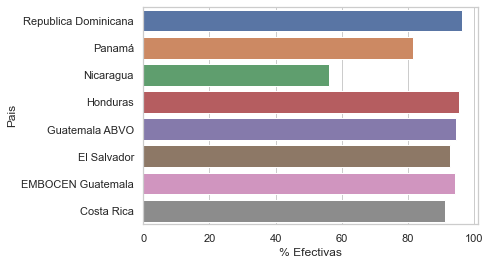

In [145]:
import seaborn as sns

sns.set_theme(style="whitegrid")
#df_chart = AG_Tracking_resultado1.set_index('Pais')
df_chart = AG_Tracking_resultado1.drop(columns='Aprobadas')
df_chart = df_chart.drop(columns='Publicadas')
df_chart.sort_values('Pais', ascending=False, inplace=True)
tips = df_chart
ax = sns.barplot(x="% Efectivas", y="Pais", data=tips)

Lo que se esperaría que todos los países dieran 100%, indicando que las evaluaciones aprobadas son cargadas casi a la vez contra las que ya están publicadas en el navegador, por lo tanto, estos nos pueden dar un punto de revisión al procesamiento de datos, ya que puede estar fallando y no les está mostrando el resultado completo al cliente final.

Se podría obtener otros tipos de revisiones como comparar las veces en que una encuesta pasar por diversos estados o cuantas fueron canceladas de las que realmente ahora dicen aprobadas, que nos puede estar dando la diferencia entre las que finalmente fueron tomadas en la publicación de resultados.

Por el momento se dejará hasta este punto a manera de presentación, muchas gracias.